# Задание
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

    На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df = pd.read_excel('AB_Test_Results.xlsx')
df.shape

c:\Users\sover\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(10000, 3)

In [3]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [4]:
new_data = df[df['REVENUE']>0] # строки где выручка больше 0
new_data

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [5]:
new_data[df['VARIANT_NAME']=='variant'].describe()

C:\Users\sover\AppData\Local\Temp\ipykernel_24760\259384231.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data[df['VARIANT_NAME']=='variant'].describe()


,USER_ID,REVENUE
count,72.000000,72.000000
mean,5306.958333,4.881528
std,3116.544256,9.913973
min,56.000000,0.020000
25%,2707.500000,1.245000
50%,5721.000000,2.170000
75%,7963.750000,3.972500
max,9996.000000,58.630000


In [6]:
new_data[df['VARIANT_NAME']=='control'].describe()

C:\Users\sover\AppData\Local\Temp\ipykernel_24760\70284805.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data[df['VARIANT_NAME']=='control'].describe()


,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


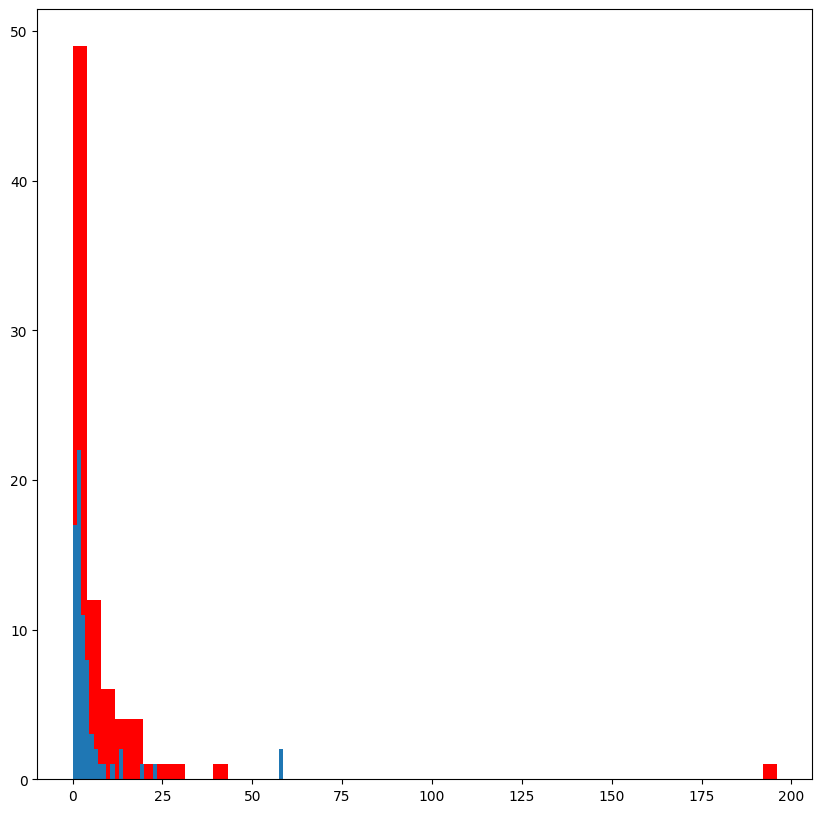

In [8]:
# График распределения
plt.figure(figsize=(10, 10))
control_visit_all = new_data['REVENUE'][df['VARIANT_NAME']=='control']
test_visit_all = new_data['REVENUE'][df['VARIANT_NAME']=='variant']

plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all, bins=50)

plt.show()

In [10]:
from scipy.stats import ttest_ind
p=ttest_ind(control_visit_all, test_visit_all, equal_var = False)[1]
p

0.25760685398932337

pvalue>0.05 -> стат. значимых значений нет

Это значит что необходимо искать другие решения для дальнейшего A/B-тестирования.